In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy as sp

# Task 1: The Vectorized Engine

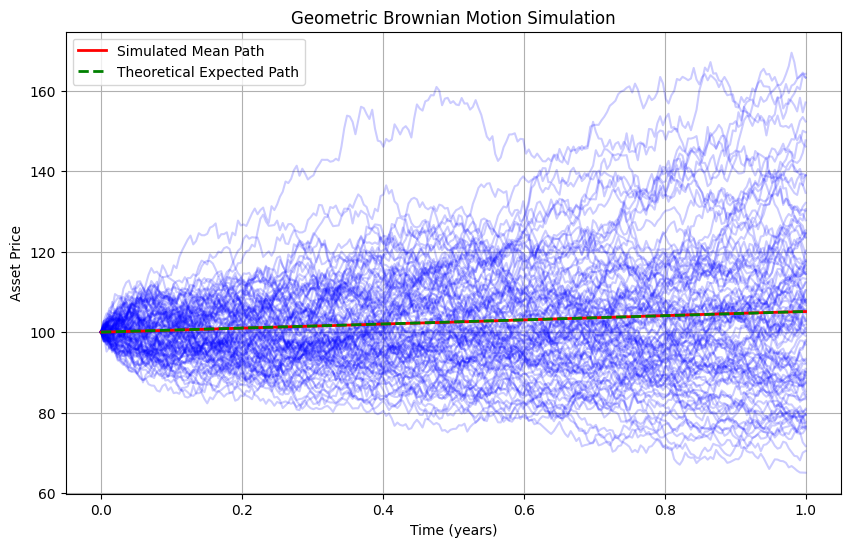

In [2]:
S0 = 100
mu = 0.05
sigma = 0.20

T = 1.0
N = 252
dt = T / N

n = 50_000

def SDE(S0, mu, sigma, T, N, n):
    Z = np.random.normal(0, 1, (n, N))
    Wt = np.cumsum(np.sqrt(dt) * Z, axis=1)
    t = np.linspace(dt, T, N)

    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * Wt)
    S = np.hstack((S0 * np.ones((n, 1)), S))
    return S

S = SDE(S0, mu, sigma, T, N, n)

mean_path = S.mean(axis=0)
t_full = np.linspace(0, T, N + 1)
expected_path = S0 * np.exp(mu * t_full)

plt.figure(figsize=(10, 6))
plt.plot(t_full, S[:100].T, alpha = 0.2, color='blue')
plt.plot(t_full, mean_path, 'r', lw=2, label='Simulated Mean Path')
plt.plot(t_full, expected_path, 'g--', lw=2, label='Theoretical Expected Path')
plt.title('Geometric Brownian Motion Simulation')
plt.xlabel('Time (years)')
plt.ylabel('Asset Price')
plt.legend()
plt.grid()
plt.show()

# Task 2: Pricing and Verfication

Black-Scholes Call Price: 10.4506
European Call Option Price: 10.4306


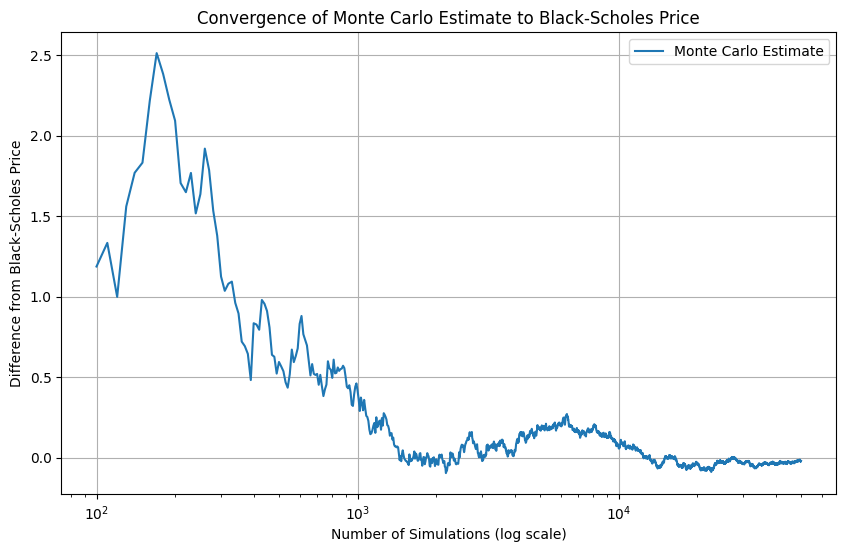

In [16]:
K = 100
r = 0.05
n_values = np.arange(100, 50001, 10)

def discounted_expected_payoff(S, T, K, r): 
    payoff = np.maximum(S[:, -1] - K, 0)
    avg_payoff = np.mean(payoff)
    V0 = np.exp(-r*T)*avg_payoff
    return V0

def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S0 * sp.stats.norm.cdf(d1) - K * np.exp(-r * T) * sp.stats.norm.cdf(d2))
    return call_price

call_price = black_scholes_call(S0, K, T, r, sigma)
print(f"Black-Scholes Call Price: {call_price:.4f}")

mc_prices = np.array([
    discounted_expected_payoff(S[:n], T, K, r)
    for n in n_values
])
errors = mc_prices - call_price

print(f"European Call Option Price: {mc_prices[-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_values, errors, label='Monte Carlo Estimate')
plt.xscale('log')

plt.title('Convergence of Monte Carlo Estimate to Black-Scholes Price')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Difference from Black-Scholes Price')
plt.legend()
plt.grid()
plt.show()

# Task 3: Pricing the Exotic

Asian Option Price: 5.7877


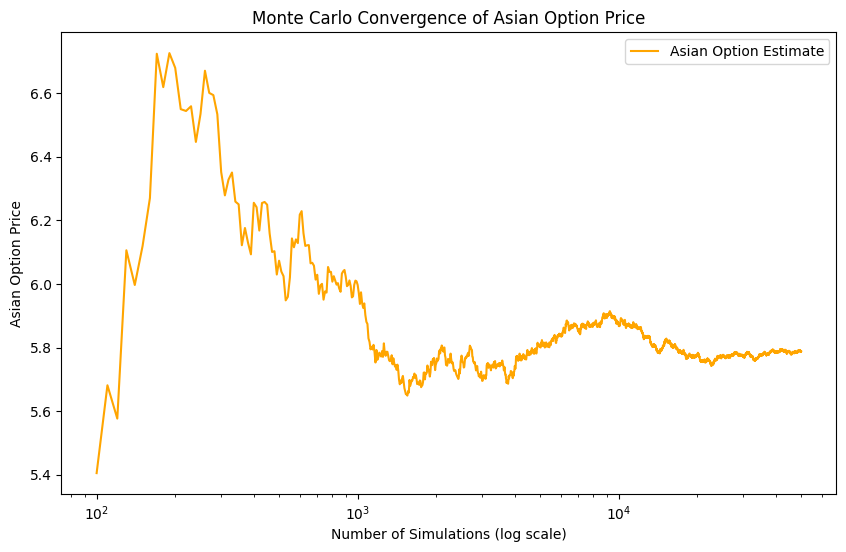

In [15]:
def asian_discounted_payoff(S):
    payoff = np.maximum(np.mean(S[:, 1:], axis=1) - K, 0)
    avg_payoff = np.mean(payoff)
    V0 = np.exp(-r*T)*avg_payoff
    return V0

asian_price = np.array([
    asian_discounted_payoff(S[:n])
    for n in n_values
])

print(f"Asian Option Price: {asian_price[-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_values, asian_price, label='Asian Option Estimate', color='orange')
plt.xscale('log')
plt.title('Monte Carlo Convergence of Asian Option Price')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Asian Option Price')
plt.legend()
plt.show()